# Trichromatic color

In [2]:
%matplotlib notebook

import numpy as np
import scipy as sci
import machinevisiontoolbox as mvtb

import matplotlib.pyplot as plt
import ipywidgets as widgets
nm = 1e-9

# Blackbody radiation curves

The radiance spectrum of a blackbody radiator is a function of temperature.  In the following animation you can change the temperature and see the radiance spectrum.  Have a look at the spectrum for a human body (311K), a lightbulb (2600K) and the sun (5778K), and remembering that the visible wavelengths are in the range 400-700nm.

In [3]:

@widgets.interact
def animate( T =  widgets.FloatSlider(value=3000, description='T (Kelvin):',  min=40, max=6000)):
    lam = np.linspace(300, 2000, 100)
    bb = mvtb.blackbody(lam*nm, T)
    plt.figure()
    plt.plot(lam, bb)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('$E(\lambda)$ (W/m^3)')
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=3000.0, description='T (Kelvin):', max=6000.0, min=40.0), Output()), _…

# Cone response

The response of the human cones has been studied and tabulated and is available in the Toolbox.

_loaddata: /Users/corkep/Dropbox/code/machinevision-toolbox-python/machinevisiontoolbox/data/cones.dat, (89, 4)


<IPython.core.display.Javascript object>


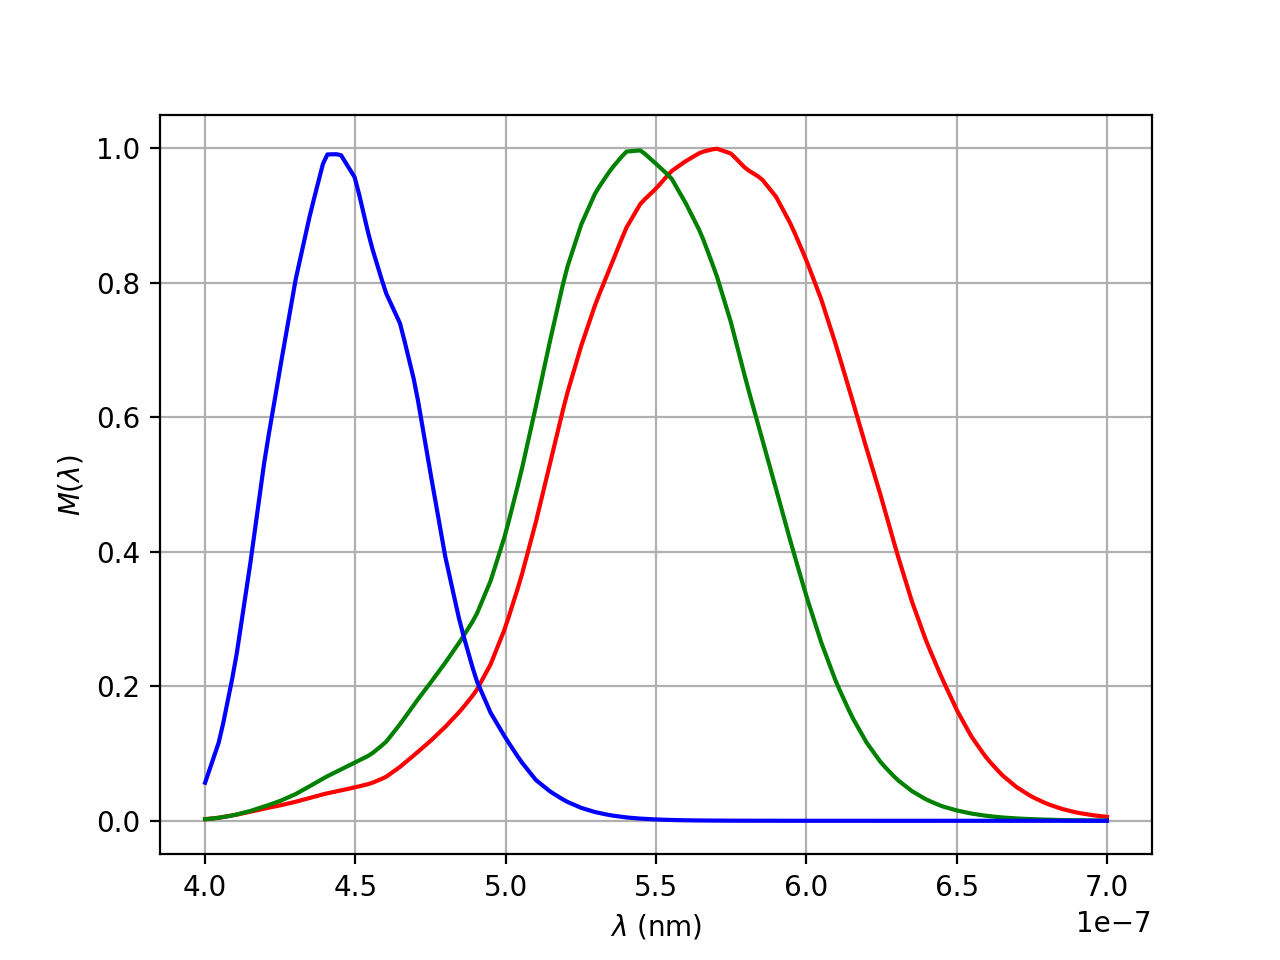

In [4]:
λ = np.linspace(400*nm, 700*nm, 200)
e = mvtb.loadspectrum(λ, "cones.dat")
plt.figure()
plt.gca().set_prop_cycle(color=['red', 'green', 'blue'])
plt.plot(λ, e)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$M(\lambda)$')
plt.grid(True)
plt.show()

In [5]:
@widgets.interact
def animate( T =  widgets.FloatSlider(value=3000, description='T (Kelvin):',  min=500, max=6000)):
    λ = np.linspace(400, 700, 200)
    bb = mvtb.blackbody(λ*nm, T)

    plt.figure()
    plt.gca().set_prop_cycle(color=['red', 'green', 'blue'])
    plt.plot(λ, e)  # plot cone response
    plt.plot(λ, bb / np.max(bb), 'k--')  # plot blackbody response
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('$M(\lambda)$')
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=3000.0, description='T (Kelvin):', max=6000.0, min=500.0), Output()), …

# Your turn!

For a blackbody radiator at 3000K determine the relative response of the red, green and blue cones. You need to convolve each cone's response with the spectrum of the light and integrate over wavelength.